## Supervised Binary Classification with parametric Algorithm
Modeling of Data as Supervised Learning Problem as a binary classification. The ten minutes leading up to the crash will be assigned with target = 1. Logistic Regression will be used, as I want to see calibrated Probabilites for Failure and change Thresholds. In this first attempt, all Features will be used.

Approach:
- Train Test Split
- Normalize Data
- Balance Dataset with SMOTE
- Train Data with simple Learning Algorithm: Logistic Regression

In [1]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


# Data Preparation
from sklearn.model_selection import train_test_split
import collections
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## Import and Check Data

In [2]:
df = pd.read_csv('transform_one.csv')

In [3]:
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,broken
0,2.458999,47.157115,53.200950,46.354164,633.940975,75.863615,13.366248,16.136790,15.612343,15.049915,...,31.705729,41.601557,39.424188,65.393518,51.070605,38.194441,156.97335,67.346648,202.401625,0
1,2.453195,47.478296,53.164060,46.397568,635.393490,75.879854,13.360821,16.168255,15.761719,15.106337,...,31.484375,42.265622,38.975694,58.043980,51.128472,39.091435,181.85764,69.733797,201.215260,0
2,2.454080,48.723958,53.190103,46.319442,635.648140,78.037966,13.353586,16.177660,15.669850,15.084637,...,31.874998,40.572914,41.984954,52.777776,46.064816,39.872686,221.87500,78.240739,200.578710,0
3,2.454178,48.554686,53.120658,46.245659,636.238420,74.929848,13.341288,16.153065,15.792101,15.070170,...,32.343747,39.583330,37.586804,47.829862,47.337964,40.538193,202.40162,100.781266,216.869210,0
4,2.454867,48.949651,53.116316,46.176213,633.750000,72.600750,13.342011,16.135703,15.661170,15.085359,...,32.421872,39.062497,36.516201,46.006944,44.155093,39.178240,220.77546,83.159725,221.527780,0


## Train-Test-Split, SMOTE, Scaling

In [4]:
X = df.drop('broken', axis=1)
y = df.broken

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=44)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9127, 50), (6085, 50), (9127,), (6085,))

In [6]:
# normally smote needs 6 neighbors, that is why i had to define number
sm = SMOTE(k_neighbors=2, random_state = 12)
X_trains, y_trains = sm.fit_resample(X_train, y_train)

print(y_train.value_counts())
print(collections.Counter(y_trains))

0    9123
1       4
Name: broken, dtype: int64
Counter({0: 9123, 1: 9123})


In [7]:
# Scaler Object
sc = StandardScaler()

# Fitting on train
sc.fit(X_trains)

# Transformation of train and test
X_trains = sc.transform(X_trains)
X_tests = sc.transform(X_test)

In [8]:
# Ohne Oversampling
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Training and Predictions

In [9]:
lr = LogisticRegression()
lr.fit(X_trains, y_trains)

LogisticRegression()

In [10]:
y_pred = lr.predict(X_test)

In [11]:
cm = confusion_matrix(y_test, y_pred)

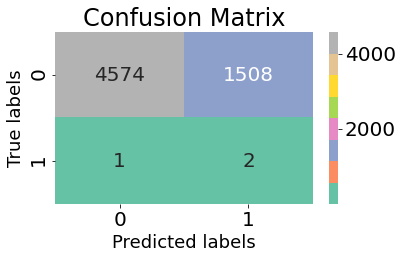

In [12]:
plt.rcParams['font.size'] = 20
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Set2', fmt="");

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=18);
ax.set_ylabel('True labels', fontsize=18); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); 
ax.yaxis.set_ticklabels(['0', '1']);
plt.tight_layout()

In [13]:
# Probabilities, first row probabilites of 0, second 
y_pred_ = lr.predict_proba(X_test)[:,1]

In [14]:
# make DataFrame with results of prediction
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'y_pred_proba':y_pred_})
results = results.sort_index()

In [15]:
results.head()

,y_test,y_pred,y_pred_proba
0,0,0,0.133019
1,0,0,0.352073
3,0,1,0.913408
6,0,1,0.644987
11,0,1,0.752195


In [16]:
# Where did prediction go wrong with default threshold?
results[(y_test == 0) & (y_pred == 1)].sort_values('y_pred_proba', ascending=True).head(20)

,y_test,y_pred,y_pred_proba
3018,0,1,0.500472
3854,0,1,0.500624
11495,0,1,0.501518
13779,0,1,0.502836
13604,0,1,0.504129
4566,0,1,0.504314
13029,0,1,0.504732
7240,0,1,0.504826
4759,0,1,0.505477
4648,0,1,0.506360


There are many false positives in the prediction. Looking at the Data it can be seen, that the Algorithm was not too sure about many of them. So it could be  a valuable try to move the threshold that detemines, which Datapoint is considered to be a positive, in this case, a pump failure. 

In [17]:
# Create new assignment of target variable
th7 = np.where(results['y_pred_proba']>=0.7,1,0)
th8 = np.where(results['y_pred_proba']>=0.8,1,0)
th9 = np.where(results['y_pred_proba']>=0.9,1,0)

In [18]:
# Add new columns with new thresholds to Results
results.insert(2, "thresh_7", th7, True)
results.insert(3, "thresh_8", th8, True)
results.insert(4, "thresh_9", th9, True)

In [19]:
# Check new DataFrame
results.head()

,y_test,y_pred,thresh_7,thresh_8,thresh_9,y_pred_proba
0,0,0,0,0,0,0.133019
1,0,0,0,0,0,0.352073
3,0,1,1,1,1,0.913408
6,0,1,0,0,0,0.644987
11,0,1,1,0,0,0.752195


In [20]:
# Look at new Confusion Matrices
cm7 = confusion_matrix(results.y_test, results.thresh_7)
cm7

array([[4989, 1093],
       [   1,    2]], dtype=int64)

In [21]:
cm8 = confusion_matrix(results.y_test, results.thresh_8)
cm8

array([[5208,  874],
       [   1,    2]], dtype=int64)

In [22]:
cm9 = confusion_matrix(results.y_test, results.thresh_9)
cm9

array([[5430,  652],
       [   1,    2]], dtype=int64)

## First Conclusion
- It is possible to predict 2 out of 3 pump failures of the test set. But- there are a lot of false flags
- Moving the threshold upwards can reduce the number of false positives significantly!

In [23]:
# Looking at false negative 
results.loc[results.y_test == 1]

,y_test,y_pred,thresh_7,thresh_8,thresh_9,y_pred_proba
7246,1,0,0,0,0,5.609694e-29
12683,1,1,1,1,1,1.000000e+00
15211,1,1,1,1,1,1.000000e+00


In [24]:
df[df.index == 7246]

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,broken
7246,2.317824,47.39583,51.475693,42.795135,608.1019,67.00203,14.19271,16.6522,16.14583,15.50926,...,172.9167,200.2604,70.8912,61.34259,127.8935,150.463,148.7269,65.39352,263.8889,1


## Next
- Try the same model with Selected Features